### Scenario 3
#### Construction year 'Wind park 1' = Construction year 'Wind park 2' = Construction year 'Artificial Energy Island'
This notebook shows the basics of Scenario 3 as suggested by Wouter van den Haak:
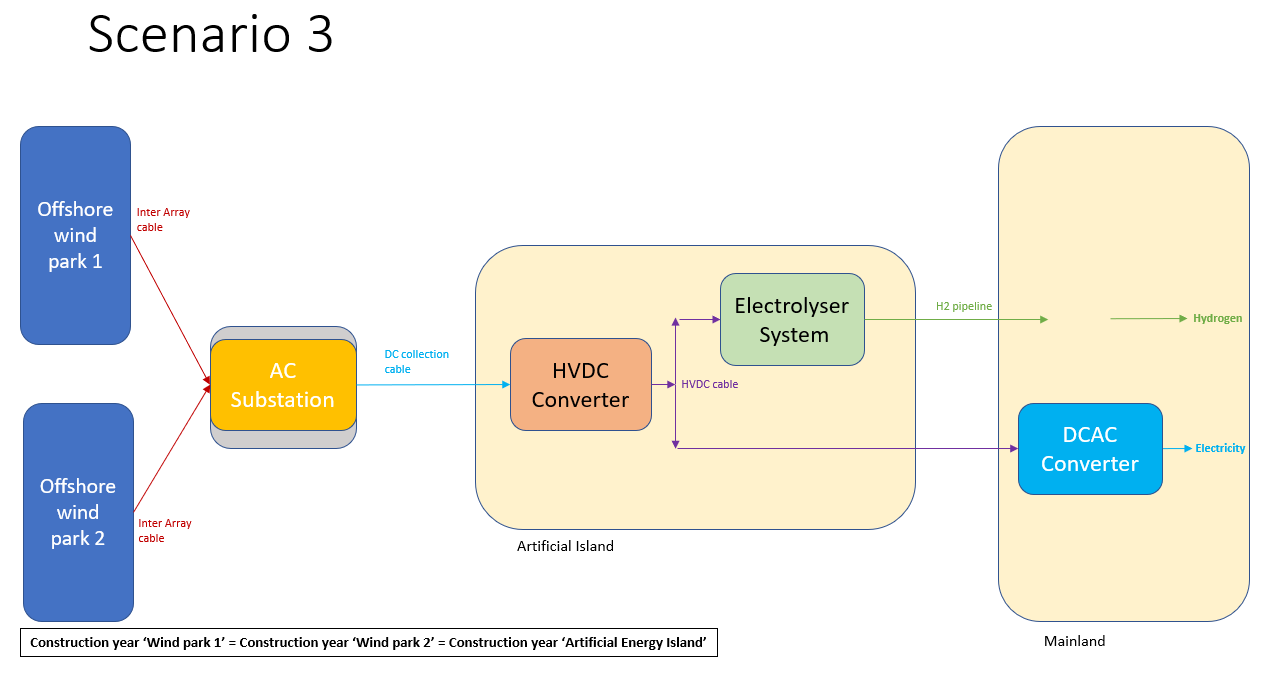

#### 0. Import basic methods (a.o. from source2.py)

In [1166]:
from source2 import *
import numpy as np
BOLD = "\033[1m"

In [1167]:
# load basic info from the Input sheet
mapping = load_input_from_xls(filename=r'Case 1 - Input Sheet.xlsm')
Inputs = extract_scenario(mapping, 'Scenario1')

##### 1. prepare input data and generate objects
#### 1.1 General input

In [1168]:
#Time input
startyear = 2023
endyear = 2052

#Escalation
escalation_base_year = 2023 
lifecycle=30               
escalation_rate=0.02    

#Distances
distance_windpark = 160000 #meter (distance windpark from shore)
distance_island_shore = 150000 #meter
distance_DC_collection = distance_windpark - distance_island_shore #meter

#Windpark
capacity_windpark1 = 3000 #MW
capacity_windpark2 = 3000 #MW

#Dedicated energy for electrolysis / electricity
dedicated_electrolyser_energy = 1
dedicated_DCAC_energy = (1 - dedicated_electrolyser_energy)

#Efficiency factors
inter_array_cable_efficiency = 0.99 
DC_collection_cable_efficiency = 0.95
HVDC_cable_efficiency = 1 - (0.01 * (0.00005 *(distance_island_shore) + 4))
H2_pipeline_efficiency = 0.95
DCAC_efficiency = 0.9

#Electricity to hydrogen conversion
kWh_to_kg = 50 #kWh/kg hydrogen

#Energy prices
electricity_price = 0.15  # 0.15 EU/kWh
hydrogen_price = 15 # 15 EU / kg 

#### 1.2 Element data
We are including the following elements:

##### 1.2.1 Foundations and cables

In [1169]:
#Wind park 1
foundation_data = get_object_data(Inputs=Inputs, 
                               subsystem='Wind energy source & Transport', 
                               element='Offshore wind park',
                               component='Foundation & cable')
foundation_data['depreciation_rate']=1/foundation_data['economic_lifetime']
foundation_data['unit'] = capacity_windpark1
display(foundation_data)

#Wind park 2
foundation2_data = get_object_data(Inputs=Inputs, 
                               subsystem='Wind energy source & Transport', 
                               element='Offshore wind park',
                               component='Foundation & cable')
foundation2_data['depreciation_rate']=1/foundation2_data['economic_lifetime']
foundation2_data['unit'] = capacity_windpark2
display(foundation2_data)

{'sub_system': 'Wind energy source & Transport',
 'element': 'Offshore wind park',
 'component': 'Foundation & cable',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 971621.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3000,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 30,
 'depreciation_flag': 1,
 'depreciation_rate': 0.03333333333333333,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.015,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.35,
 'residual_value': 0.01}

{'sub_system': 'Wind energy source & Transport',
 'element': 'Offshore wind park',
 'component': 'Foundation & cable',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 971621.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3000,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 30,
 'depreciation_flag': 1,
 'depreciation_rate': 0.03333333333333333,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.015,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.35,
 'residual_value': 0.01}

In [1170]:
#Wind park 1
Foundation = Object(**foundation_data)

#Wind park 2
Foundation2 = Object(**foundation2_data)

In [1171]:
#Wind park 1
Foundation.generate_cashflows(startyear=2023, lifecycle=30, debug=False)

#Wind park 2
Foundation2.generate_cashflows(startyear=2023, lifecycle=30, debug=False)

##### 1.2.2 Turbines

In [1172]:
#Wind park 1
turbine_data = get_object_data(Inputs=Inputs, 
                               subsystem='Wind energy source & Transport', 
                               element='Offshore wind park',
                               component='Turbine')
turbine_data['depreciation_rate']=1/turbine_data['economic_lifetime']
turbine_data['unit']=capacity_windpark1
display(turbine_data)

#Wind park 2
turbine2_data = get_object_data(Inputs=Inputs, 
                               subsystem='Wind energy source & Transport', 
                               element='Offshore wind park',
                               component='Turbine')
turbine2_data['depreciation_rate']=1/turbine2_data['economic_lifetime']
turbine2_data['unit']=capacity_windpark2
display(turbine2_data)

{'sub_system': 'Wind energy source & Transport',
 'element': 'Offshore wind park',
 'component': 'Turbine',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 1139979.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3000,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 30,
 'depreciation_flag': 1,
 'depreciation_rate': 0.03333333333333333,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.03,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.08,
 'residual_value': 0.01}

{'sub_system': 'Wind energy source & Transport',
 'element': 'Offshore wind park',
 'component': 'Turbine',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 1139979.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3000,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 30,
 'depreciation_flag': 1,
 'depreciation_rate': 0.03333333333333333,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.03,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.08,
 'residual_value': 0.01}

In [1173]:
#Wind park 1
Turbine = Object(**turbine_data)

#Wind park 2
Turbine2 = Object(**turbine2_data)

In [1174]:
#Wind park 1
Turbine.generate_cashflows(startyear=2023, lifecycle=30, debug=False)

#Wind park 2
Turbine2.generate_cashflows(startyear=2023, lifecycle=30, debug=False)

##### 1.3.1 AC Substation

In [1175]:
#AC Substation 1
AC_substation_data = get_object_data(Inputs=Inputs, 
                               subsystem='AC Substation & Transport', 
                               element='AC Substation & Transport',
                               component='AC Substation')
AC_substation_data['depreciation_rate']=1/AC_substation_data['economic_lifetime']
AC_substation_data['unit'] = turbine_data['unit'] + turbine2_data['unit']
display(AC_substation_data)

{'sub_system': 'AC Substation & Transport',
 'element': 'AC Substation & Transport',
 'component': 'AC Substation',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 185000.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 6000,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 40,
 'depreciation_flag': 1,
 'depreciation_rate': 0.025,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.03,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.2,
 'residual_value': 0.01}

In [1176]:
#AC Substation 1
ACStation = Object(**AC_substation_data)

In [1177]:
#AC Substation 1
ACStation.generate_cashflows(startyear=2023, lifecycle=30, debug=False)

##### 1.3.2 DC Collection Cable

In [1178]:
#DC Collection Cable 1
DC_collection_cable_data = get_object_data(Inputs=Inputs, 
                               subsystem='AC Substation & Transport', 
                               element='AC Substation & Transport',
                               component='DC collection cable')
DC_collection_cable_data['depreciation_rate']=1/DC_collection_cable_data['economic_lifetime']
DC_collection_cable_data['unit'] = distance_DC_collection
display(DC_collection_cable_data)

{'sub_system': 'AC Substation & Transport',
 'element': 'AC Substation & Transport',
 'component': 'DC collection cable',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 2000.0,
 'capex_per_unit_units': 'EUR / m',
 'unit': 10000,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 40,
 'depreciation_flag': 1,
 'depreciation_rate': 0.025,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.03,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.2,
 'residual_value': 0.01}

In [1179]:
#DC Collection Cable 1
DCCollectionCable = Object(**DC_collection_cable_data)

In [1180]:
#DC Collection Cable 1
DCCollectionCable.generate_cashflows(startyear=2023, lifecycle=30, debug=False)

##### 1.4.1 HVDC Converter

In [1181]:
#HVDC Converter 1
HVDC_converter_data = get_object_data(Inputs=Inputs, 
                               subsystem='Converter & Transport', 
                               element='Converter',
                               component='HVDC Converter')
HVDC_converter_data['depreciation_rate']=1/HVDC_converter_data['economic_lifetime']
HVDC_converter_data['unit'] = turbine_data['unit'] + turbine2_data['unit']
display(HVDC_converter_data)

{'sub_system': 'Converter & Transport',
 'element': 'Converter',
 'component': 'HVDC Converter',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 472500.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 6000,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 30,
 'depreciation_flag': 1,
 'depreciation_rate': 0.03333333333333333,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

In [1182]:
#HVDC Converter 1
HVDCConverter = Object(**HVDC_converter_data)

In [1183]:
#HVDC Converter 1
HVDCConverter.generate_cashflows(startyear=2023, lifecycle=30, debug=False)

##### 1.4.2 HVDC Cable

In [1184]:
#HVDC Cable 1
HVDC_cable_data = get_object_data(Inputs=Inputs, 
                               subsystem='Converter & Transport', 
                               element='Converter',
                               component='HVDC Cable')
HVDC_cable_data['depreciation_rate']=1/HVDC_cable_data['economic_lifetime']
HVDC_cable_data['unit'] = distance_island_shore
display(HVDC_cable_data)

#HVDC Cable 2
HVDC_cable2_data = get_object_data(Inputs=Inputs, 
                               subsystem='Converter & Transport', 
                               element='Converter',
                               component='HVDC Cable')
HVDC_cable2_data['depreciation_rate']=1/HVDC_cable2_data['economic_lifetime']
HVDC_cable2_data['unit'] = distance_island_shore
display(HVDC_cable2_data)

{'sub_system': 'Converter & Transport',
 'element': 'Converter',
 'component': 'HVDC Cable',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 2680.0,
 'capex_per_unit_units': 'EUR / m',
 'unit': 150000,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 30,
 'depreciation_flag': 1,
 'depreciation_rate': 0.03333333333333333,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

{'sub_system': 'Converter & Transport',
 'element': 'Converter',
 'component': 'HVDC Cable',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 2680.0,
 'capex_per_unit_units': 'EUR / m',
 'unit': 150000,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 30,
 'depreciation_flag': 1,
 'depreciation_rate': 0.03333333333333333,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

In [1185]:
#HVDC Cable 1
HVDCCable = Object(**HVDC_cable_data)

#HVDC Cable 2
HVDCCable2 = Object(**HVDC_cable2_data)

In [1186]:
#HVDC Cable 1
HVDCCable.generate_cashflows(startyear=2023, lifecycle=30, debug=False)

#HVDC Cable 2
HVDCCable2.generate_cashflows(startyear=2023, lifecycle=30, debug=False)

##### 1.5.1 Electrolyser

In [1187]:
#Electrolyser 1
Electrolyser_data = get_object_data(Inputs=Inputs, 
                               subsystem='Electrolysis, Electricity & Transport', 
                               element='Electrolysis',
                               component='Electrolyser')
Electrolyser_data['depreciation_rate']=1/Electrolyser_data['economic_lifetime']
Electrolyser_data['unit'] = (turbine_data['unit'] + turbine2_data['unit']) * dedicated_electrolyser_energy
display(Electrolyser_data)

{'sub_system': 'Electrolysis, Electricity & Transport',
 'element': 'Electrolysis',
 'component': 'Electrolyser',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 535000.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 6000,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 25,
 'depreciation_flag': 1,
 'depreciation_rate': 0.04,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

In [1188]:
#Electrolyser 1
Electrolyser = Object(**Electrolyser_data)

In [1189]:
#Electrolyser 1
Electrolyser.generate_cashflows(startyear=2023, lifecycle=30, debug=False)

##### 1.5.2 Desalination Unit

In [1190]:
#Desalination Unit 1
Desalination_unit_data = get_object_data(Inputs=Inputs, 
                               subsystem='Electrolysis, Electricity & Transport', 
                               element='Electrolysis',
                               component='Desalination unit')
Desalination_unit_data['depreciation_rate']=1/Desalination_unit_data['economic_lifetime']
Desalination_unit_data['unit'] = (turbine_data['unit'] + turbine2_data['unit']) * dedicated_electrolyser_energy
display(Desalination_unit_data)

{'sub_system': 'Electrolysis, Electricity & Transport',
 'element': 'Electrolysis',
 'component': 'Desalination unit',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 3900.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 6000,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 15,
 'depreciation_flag': 1,
 'depreciation_rate': 0.06666666666666667,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

In [1191]:
#Desalination Unit 1
DesalinationUnit = Object(**Desalination_unit_data)

In [1192]:
#Desalination Unit 1
DesalinationUnit.generate_cashflows(startyear=2023, lifecycle=30, debug=False)

##### 1.5.3 Compressor Unit

In [1193]:
#Compressor Unit 1
Compressor_unit_data = get_object_data(Inputs=Inputs, 
                               subsystem='Electrolysis, Electricity & Transport', 
                               element='Electrolysis',
                               component='Compressor unit')
Compressor_unit_data['depreciation_rate']=1/Compressor_unit_data['economic_lifetime']
Compressor_unit_data['unit'] = (turbine_data['unit'] + turbine2_data['unit']) * dedicated_electrolyser_energy
display(Compressor_unit_data)

{'sub_system': 'Electrolysis, Electricity & Transport',
 'element': 'Electrolysis',
 'component': 'Compressor unit',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 153000.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 6000,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 15,
 'depreciation_flag': 1,
 'depreciation_rate': 0.06666666666666667,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

In [1194]:
#Compressor Unit 1
CompressorUnit = Object(**Compressor_unit_data)

In [1195]:
#Compressor Unit 1
CompressorUnit.generate_cashflows(startyear=2023, lifecycle=30, debug=False)

##### 1.5.4 Storage Unit

In [1196]:
#Storage Unit 1
Storage_unit_data = get_object_data(Inputs=Inputs, 
                               subsystem='Electrolysis, Electricity & Transport', 
                               element='Electrolysis',
                               component='Storage unit')
Storage_unit_data['depreciation_rate']=1/Storage_unit_data['economic_lifetime']
Storage_unit_data['unit'] = (turbine_data['unit'] + turbine2_data['unit']) * dedicated_electrolyser_energy
display(Storage_unit_data)

{'sub_system': 'Electrolysis, Electricity & Transport',
 'element': 'Electrolysis',
 'component': 'Storage unit',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 290000.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 6000,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 15,
 'depreciation_flag': 1,
 'depreciation_rate': 0.06666666666666667,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

In [1197]:
#Storage Unit 1
StorageUnit = Object(**Storage_unit_data)

In [1198]:
#Storage Unit 1
StorageUnit.generate_cashflows(startyear=2023, lifecycle=30, debug=False)

##### 1.5.5 Compressor after storage

In [1199]:
#Compressor after storage 1
Compressor_after_storage_data = get_object_data(Inputs=Inputs, 
                               subsystem='Electrolysis, Electricity & Transport', 
                               element='Electrolysis',
                               component='Compressor after storage')
Compressor_after_storage_data['depreciation_rate']=1/Compressor_after_storage_data['economic_lifetime']
Compressor_after_storage_data['unit'] = (turbine_data['unit'] + turbine2_data['unit']) * dedicated_electrolyser_energy
display(Compressor_after_storage_data)

{'sub_system': 'Electrolysis, Electricity & Transport',
 'element': 'Electrolysis',
 'component': 'Compressor after storage',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 10200.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 6000,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 15,
 'depreciation_flag': 1,
 'depreciation_rate': 0.06666666666666667,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

In [1200]:
#Compressor after storage 1
CompressorAfterStorage = Object(**Compressor_after_storage_data)

In [1201]:
#Compressor after storage 1
CompressorAfterStorage.generate_cashflows(startyear=2023, lifecycle=30, debug=False)

##### 1.6 DCAC Converter

In [1202]:
#DCAC Converter 1
DCAC_converter_data = get_object_data(Inputs=Inputs, 
                               subsystem='Electrolysis, Electricity & Transport', 
                               element='Electricity',
                               component='DCAC Converter')
DCAC_converter_data['depreciation_rate']=1/DCAC_converter_data['economic_lifetime']
DCAC_converter_data['unit'] = (turbine_data['unit'] + turbine2_data['unit']) * dedicated_DCAC_energy
display(DCAC_converter_data)

{'sub_system': 'Electrolysis, Electricity & Transport',
 'element': 'Electricity',
 'component': 'DCAC Converter',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 285000.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 0,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 25,
 'depreciation_flag': 1,
 'depreciation_rate': 0.04,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.03,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.25,
 'residual_value': 0.01}

In [1203]:
#DCAC Converter 1
DCACConverter = Object(**DCAC_converter_data)

In [1204]:
#DCAC Converter 1
DCACConverter.generate_cashflows(startyear=2023, lifecycle=30, debug=False)

##### 1.7.1 Artificial Island

In [1205]:
Artificial_island_data = get_object_data(Inputs=Inputs, 
                               subsystem='Electrolysis, Electricity & Transport', 
                               element='Facility location',
                               component='Artificial island')
Artificial_island_data['depreciation_rate']=1/Artificial_island_data['economic_lifetime']
Artificial_island_data['unit']=turbine_data['unit']+turbine2_data['unit']
display(Artificial_island_data)

{'sub_system': 'Electrolysis, Electricity & Transport',
 'element': 'Facility location',
 'component': 'Artificial island',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 800000.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 6000,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 80,
 'depreciation_flag': 1,
 'depreciation_rate': 0.0125,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

In [1206]:
ArtificialIsland = Object(**Artificial_island_data)

In [1207]:
ArtificialIsland.generate_cashflows(startyear=2023, lifecycle=30, debug=False)

##### 1.7.2 Mainland

In [1208]:
Mainland_data = get_object_data(Inputs=Inputs, 
                               subsystem='Electrolysis, Electricity & Transport', 
                               element='Facility location',
                               component='Mainland')
Mainland_data['depreciation_rate']=1/Mainland_data['economic_lifetime']
Mainland_data['unit'] = (turbine_data['unit'] + turbine2_data['unit']) * dedicated_DCAC_energy
display(Mainland_data)

issue detected


{'sub_system': 'Electrolysis, Electricity & Transport',
 'element': 'Facility location',
 'component': 'Mainland',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 6000.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 0,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 80,
 'depreciation_flag': 1,
 'depreciation_rate': 0.0125,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.1,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.01,
 'residual_value': []}

In [1209]:
Mainland = Object(**Mainland_data)

In [1210]:
Mainland.generate_cashflows(startyear=2023, lifecycle=30, debug=False)

##### 1.8.1 H2 Pipeline

In [1211]:
H2_pipeline_data = get_object_data(Inputs=Inputs, 
                               subsystem='Electrolysis, Electricity & Transport', 
                               element='Transport',
                               component='H2 Pipeline')
H2_pipeline_data['depreciation_rate']=1/H2_pipeline_data['economic_lifetime']
H2_pipeline_data['unit'] = distance_island_shore 
display(H2_pipeline_data)

issue detected


{'sub_system': 'Electrolysis, Electricity & Transport',
 'element': 'Transport',
 'component': 'H2 Pipeline',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 6800.0,
 'capex_per_unit_units': 'EUR / m',
 'unit': 0,
 'unit_units': 'm',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 30,
 'depreciation_flag': 1,
 'depreciation_rate': 0.03333333333333333,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': []}

In [1212]:
H2Pipeline = Object(**H2_pipeline_data)

In [1213]:
H2Pipeline.generate_cashflows(startyear=2023, lifecycle=30, debug=False)

##### 2. Generate combined cashflows

In [1214]:
# place escalated revenue values in the cashflow dataframe
df_combined=combine_cashflow_dataframes([Foundation.df, Foundation2.df, Turbine.df, Turbine2.df, ACStation.df, DCCollectionCable.df, HVDCConverter.df, HVDCCable.df, HVDCCable2.df, Electrolyser.df, DesalinationUnit.df, CompressorUnit.df, StorageUnit.df, CompressorAfterStorage.df, DCACConverter.df, ArtificialIsland.df, Mainland.df, H2Pipeline.df])

##### 3. Calculate NPVs

In [1215]:
df_combined_npv=calculate_npv(df_combined, 2023, WACC=0.0984)

##### 4. Plots

##### 4.1. NPV Plot

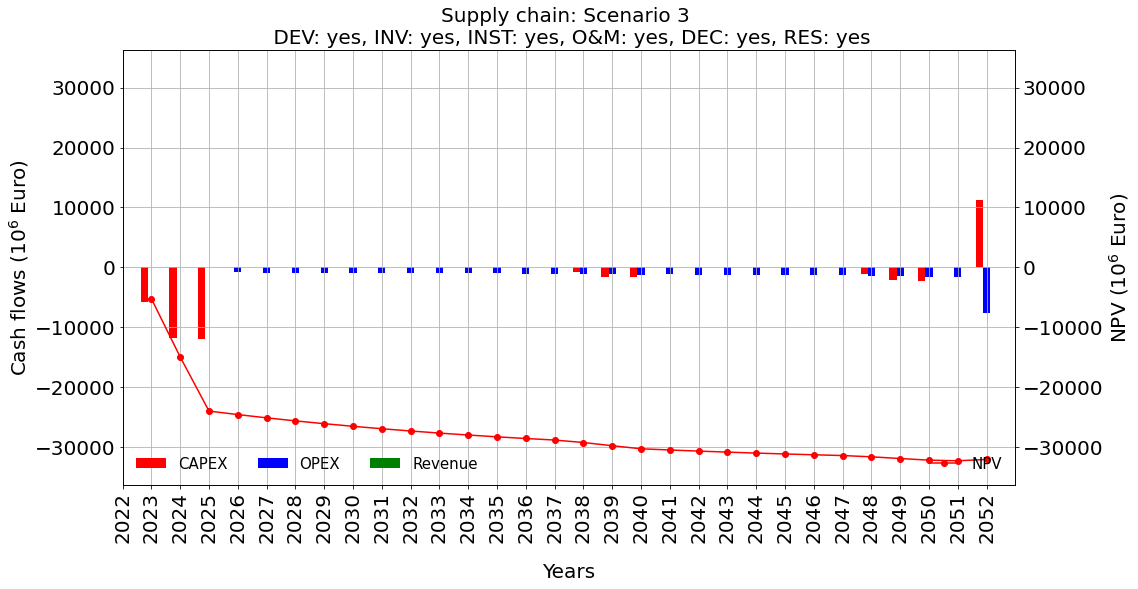

In [1216]:
# DEV: Project development costs
# INV: Investment / procurement costs
# INST: Installation / construction costs 
# O&M: Yearly variable / O&M costs 
# DEC: Decommissioning costs 
# RES: Residual value   

create_npv_plot(df_combined_npv, title='Supply chain: Scenario 3 \n DEV: yes, INV: yes, INST: yes, O&M: yes, DEC: yes, RES: yes' )

##### 4.2. Pie chart

In [1217]:
# collect the npv calculations per item (without revenues)
Foundation.df_npv = calculate_npv(Foundation.df, 2023, WACC=0.0984)
Foundation2.df_npv = calculate_npv(Foundation.df, 2023, WACC=0.0984)

Turbine.df_npv = calculate_npv(Turbine.df, 2023, WACC=0.0984)
Turbine2.df_npv = calculate_npv(Turbine.df, 2023, WACC=0.0984)

ACStation.df_npv = calculate_npv(ACStation.df, 2023, WACC=0.0984)
DCCollectionCable.df_npv = calculate_npv(DCCollectionCable.df, 2023, WACC=0.0984)

HVDCConverter.df_npv = calculate_npv(HVDCConverter.df, 2023, WACC=0.0984)
HVDCCable.df_npv = calculate_npv(HVDCCable.df, 2023, WACC=0.0984)
HVDCCable2.df_npv = calculate_npv(HVDCCable2.df, 2023, WACC=0.0984)

Electrolyser.df_npv = calculate_npv(Electrolyser.df, 2023, WACC=0.0984)
DesalinationUnit.df_npv = calculate_npv(DesalinationUnit.df, 2023, WACC=0.0984)
CompressorUnit.df_npv = calculate_npv(CompressorUnit.df, 2023, WACC=0.0984)
StorageUnit.df_npv = calculate_npv(StorageUnit.df, 2023, WACC=0.0984)
CompressorAfterStorage.df_npv = calculate_npv(CompressorAfterStorage.df, 2023, WACC=0.0984)

DCACConverter.df_npv = calculate_npv(DCACConverter.df, 2023, WACC=0.0984)

ArtificialIsland.df_npv = calculate_npv(ArtificialIsland.df, 2023, WACC=0.0984)
Mainland.df_npv = calculate_npv(Mainland.df, 2023, WACC=0.0984)

H2Pipeline.df_npv = calculate_npv(H2Pipeline.df, 2023, WACC=0.0984)

In [1218]:
# prepare input for pie chart

# combine the values of certain items
foundation_cables_value = -Foundation.df_npv.cashflow_sum.iloc[-1] - Foundation2.df_npv.cashflow_sum.iloc[-1]
turbine_value = -Turbine.df_npv.cashflow_sum.iloc[-1] - Turbine2.df_npv.cashflow_sum.iloc[-1]
AC_substation_value = -ACStation.df_npv.cashflow_sum.iloc[-1] - DCCollectionCable.df_npv.cashflow_sum.iloc[-1]
hvdc_converter_value = -HVDCConverter.df_npv.cashflow_sum.iloc[-1] -HVDCCable.df_npv.cashflow_sum.iloc[-1] -HVDCCable.df_npv.cashflow_sum.iloc[-1]
electrolysis_value = -Electrolyser.df_npv.cashflow_sum.iloc[-1] -DesalinationUnit.df_npv.cashflow_sum.iloc[-1] -CompressorUnit.df_npv.cashflow_sum.iloc[-1] -StorageUnit.df_npv.cashflow_sum.iloc[-1] -CompressorAfterStorage.df_npv.cashflow_sum.iloc[-1]
dcac_converter_value = -DCACConverter.df_npv.cashflow_sum.iloc[-1] 
artificial_island_value = -ArtificialIsland.df_npv.cashflow_sum.iloc[-1]
mainland_value = -Mainland.df_npv.cashflow_sum.iloc[-1]
H2_pipeline_value = -H2Pipeline.df_npv.cashflow_sum.iloc[-1]

# create a new data point for each combined value
labels = ['Foundation & cables', 'Turbine', 'AC Substation', 'HVDC Converter', 'Electrolysis', 'DCAC Converter', 'Artificial Island', 'H2 Pipeline', 'Electricity Cable']
data = [foundation_cables_value, turbine_value, AC_substation_value, hvdc_converter_value, electrolysis_value, dcac_converter_value, artificial_island_value, H2_pipeline_value
]


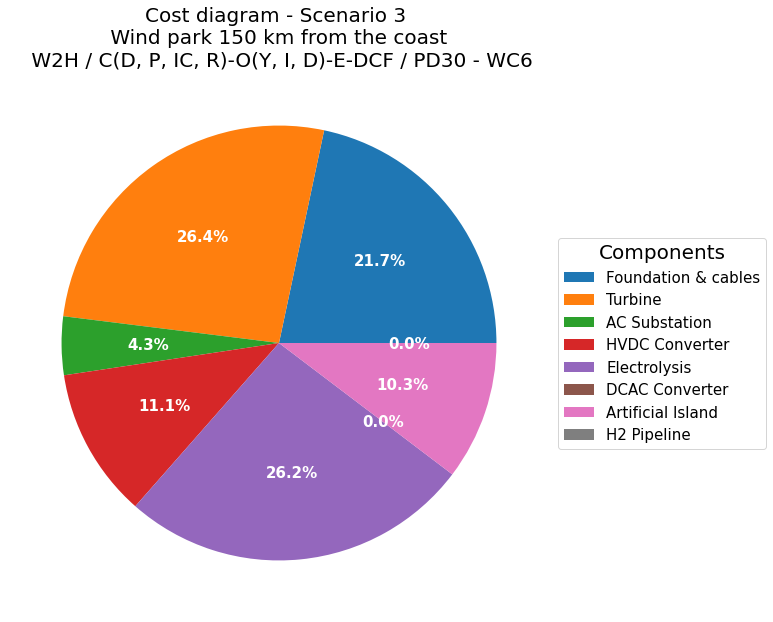

Total cost: 61.51 billion EUR


In [1219]:
# create pie plot
fig, ax = plt.subplots(figsize=(16, 10), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%"


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, labels,
          title="Components",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
         fontsize=15)

plt.setp(autotexts, size=15, weight="bold")

ax.set_title("Cost diagram - Scenario 3 \n Wind park 150 km from the coast \n W2H / C(D, P, IC, R)-O(Y, I, D)-E-DCF / PD30 - WC6", fontsize=20)

plt.show()

cost_in_billions = total_cost / 1_000_000_000
print(f"Total cost: {cost_in_billions:.2f} billion EUR")

##### 5. Energy production + LCOE & LCOH

In [1220]:
wind_energy_production_per_year_park1 = (turbine_data['unit']) * 1000 * 4380
print('wind_energy_production_per_year_park1: {:.0f} kWh'.format(wind_energy_production_per_year_park1))
wind_energy_production_per_year_park2 = (turbine2_data['unit']) * 1000 * 4380
print('wind_energy_production_per_year_park2: {:.0f} kWh'.format(wind_energy_production_per_year_park2))

total_wind_energy_production_per_year = []
for year in range(startyear, endyear+1):
    if year < (startyear + turbine_data['construction_duration']):
        # Wind park 1 not yet operational
        total_wind_energy_production_per_year.append(0)
    else:
        # Both wind parks operational
        total_wind_energy_production_per_year.append(wind_energy_production_per_year_park1 + wind_energy_production_per_year_park2)

# Create a DataFrame to hold the data
production_data = {
    'Year': range(startyear, endyear+1),
    'Wind Energy Production (kWh)': total_wind_energy_production_per_year
}
df = pd.DataFrame(production_data)

# Print the table
print(df)

wind_energy_production_per_year_park1: 13140000000 kWh
wind_energy_production_per_year_park2: 13140000000 kWh
    Year  Wind Energy Production (kWh)
0   2023                             0
1   2024                             0
2   2025                             0
3   2026                   26280000000
4   2027                   26280000000
5   2028                   26280000000
6   2029                   26280000000
7   2030                   26280000000
8   2031                   26280000000
9   2032                   26280000000
10  2033                   26280000000
11  2034                   26280000000
12  2035                   26280000000
13  2036                   26280000000
14  2037                   26280000000
15  2038                   26280000000
16  2039                   26280000000
17  2040                   26280000000
18  2041                   26280000000
19  2042                   26280000000
20  2043                   26280000000
21  2044                   26280

In [1221]:
# Multiply every annual value by the cable efficiency factors
wind_energy_production_per_year_after_cable_losses = []
for energy in total_wind_energy_production_per_year:
    energy_after_cable_losses = energy * inter_array_cable_efficiency * DC_collection_cable_efficiency * HVDC_cable_efficiency
    wind_energy_production_per_year_after_cable_losses.append(energy_after_cable_losses)

# Calculate energy after electrolysis and transportation onshore and convert to kg hydrogen
hydrogen_onshore_per_year = []
for energy in wind_energy_production_per_year_after_cable_losses:
    energy_after_electrolysis = energy * dedicated_electrolyser_energy / kWh_to_kg
    energy_after_pipeline = energy_after_electrolysis * H2_pipeline_efficiency
    hydrogen_onshore_per_year.append(energy_after_pipeline)

# Calculate energy after DCAC converter and transportation onshore
electricity_onshore_per_year = []
for energy in wind_energy_production_per_year_after_cable_losses:
    energy_after_DCAC = energy * dedicated_DCAC_energy * DCAC_efficiency
    electricity_onshore_per_year.append(energy_after_DCAC)

# Print summed values
total_hydrogen_onshore = sum(hydrogen_onshore_per_year)
total_electricity_onshore = sum(electricity_onshore_per_year)
print("Total hydrogen onshore: {:.2f} kg hydrogen".format(total_hydrogen_onshore))
print("Total electricity onshore: {:.2f} kWh".format(total_electricity_onshore))
    

Total hydrogen onshore: 11221341941.70 kg hydrogen
Total electricity onshore: 0.00 kWh


In [1222]:
total_cost = sum(data)            # EU

In [1223]:
LCOH = total_cost / total_hydrogen_onshore
LCOE = total_cost / total_electricity_onshore

print('LCOH: {:.2f} EU/kg'.format(LCOH))
print('LCOE: {:.2f} EU/kWh'.format(LCOE))

LCOH: 5.76 EU/kg
LCOE: inf EU/kWh


C:\Users\W5G\AppData\Local\Temp\ipykernel_4944\1988298772.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  LCOE = total_cost / total_electricity_onshore


In [1224]:
total_wind_energy_production = sum(total_wind_energy_production_per_year)

hydrogen_energy_produced = total_hydrogen_onshore * 141.8 #MJ / kg
electricity_energy_produced = total_electricity_onshore * 3.6 #MJ / kWh

electrical_energy_input = total_wind_energy_production * 3.6 #MJ / kWh

SupplyChain_efficiency = (hydrogen_energy_produced + electricity_energy_produced) / electrical_energy_input 

print('SupplyChain efficiency: {:.2f} %'.format(SupplyChain_efficiency*100))

SupplyChain efficiency: 62.29 %


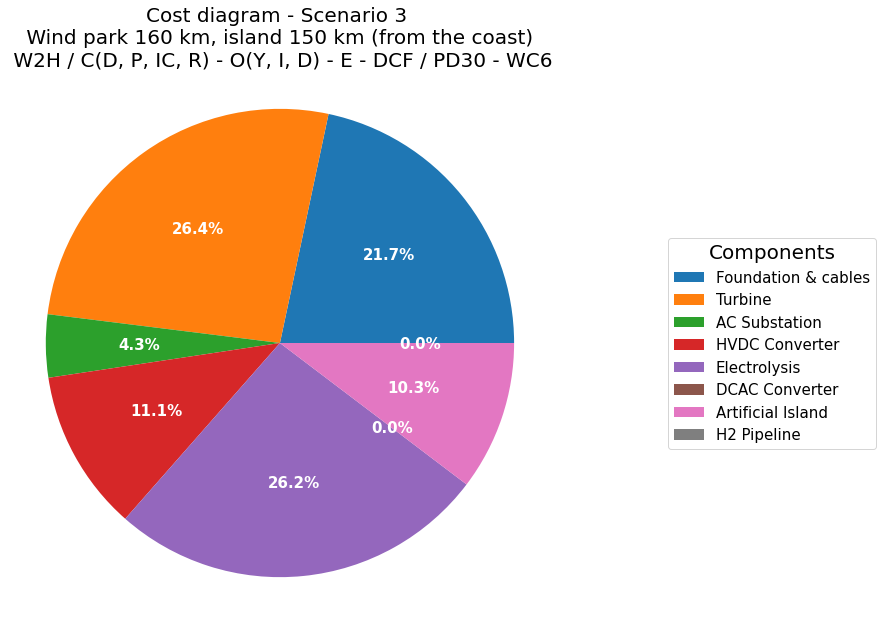

Total cost: 64.61 billion EUR
LCOH: 5.76 EUR / kg
LCOE: inf EUR / kWh
Supply Chain efficiency: 62.29 %


In [1225]:
fig, ax = plt.subplots(figsize=(16, 10), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%"

total_cost = sum(data)
wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), radius=total_cost/60000000000)

ax.legend(wedges, labels,
          title="Components",
          loc="center left",
          bbox_to_anchor=(1.2, 0.5),
          fontsize=15)

plt.setp(autotexts, size=15, weight="bold")

title = ax.set_title("Cost diagram - Scenario 3 \n Wind park 160 km, island 150 km (from the coast) \n W2H / C(D, P, IC, R) - O(Y, I, D) - E - DCF / PD30 - WC6", fontsize=20)

plt.show()

cost_in_billions = total_cost / 1_000_000_000
print(f"{BOLD}Total cost: {cost_in_billions:.2f} billion EUR")
print(f"LCOH: {LCOH:.2f} EUR / kg")
print(f"LCOE: {LCOE:.2f} EUR / kWh")
print('Supply Chain efficiency: {:.2f} %'.format(SupplyChain_efficiency*100))

##### 6 - Revenues

In [1226]:
# make df_combined again (only cashflows no npv yet)
df_combined=combine_cashflow_dataframes([Foundation.df, Foundation2.df, Turbine.df, Turbine2.df, ACStation.df, DCCollectionCable.df, HVDCConverter.df, HVDCCable.df, HVDCCable2.df, Electrolyser.df, DesalinationUnit.df, CompressorUnit.df, StorageUnit.df, CompressorAfterStorage.df, DCACConverter.df, ArtificialIsland.df, H2Pipeline.df])

In [1227]:
# create a set of escalation years and values
escalation_years = []
escalation_values = []
previous = 1
for index, year in enumerate(list(range(escalation_base_year, escalation_base_year + lifecycle + 1))):
    previous = previous * (1 + escalation_rate)
    escalation_years.append(year)    
    escalation_values.append(previous)

In [1228]:
# create list of revenue years
revenue_years = list(range(startyear, endyear+1))

# calculate revenues for both electricity and hydrogen
electricity_revenue_value_per_year = [energy * electricity_price for energy in electricity_onshore_per_year]
hydrogen_revenue_value_per_year = [energy * hydrogen_price for energy in hydrogen_onshore_per_year]

# create a list of the combined electricity and hydrogen revenue values (summed)
revenue_values = []
for e, h in zip(electricity_revenue_value_per_year, hydrogen_revenue_value_per_year):
    revenue_values.append(e + h)

# escalate the combined electricity and hydrogen revenue values
for i, revenue_year in enumerate(revenue_years):
            revenue_values[i] = revenue_values[i] * escalation_values[
                [index for index, escalation_year in enumerate(escalation_years) if
                 escalation_year == revenue_year][0]]

In [1229]:
# add the escalated combined electricity and hydrogen revenue values to df_combined
for i, revenue_year in enumerate(revenue_years):
    df_combined.loc[revenue_year, 'revenue'] = revenue_values[i]

In [1230]:
# calculate the npv values
df_combined_npv = calculate_npv(df_combined, 2023, WACC=0.0984)

In [1231]:
import numpy_financial as npf

# Calculate the NPV of the cash flows
df_combined_npv = calculate_npv(df_combined, 2023, WACC=0.0984)

# Extract the cash flows from the DataFrame and convert to a one-dimensional array
cash_flows = df_combined_npv['npv'].values

# Calculate the internal rate of return (IRR)
irr = npf.irr(cash_flows)

# Convert the IRR to a string with two decimal places
irr_str = "{:.2f}%".format(irr * 100)

# Print the IRR
print("Internal Rate of Return (IRR): {:.2%}".format(irr))

Internal Rate of Return (IRR): 8.20%


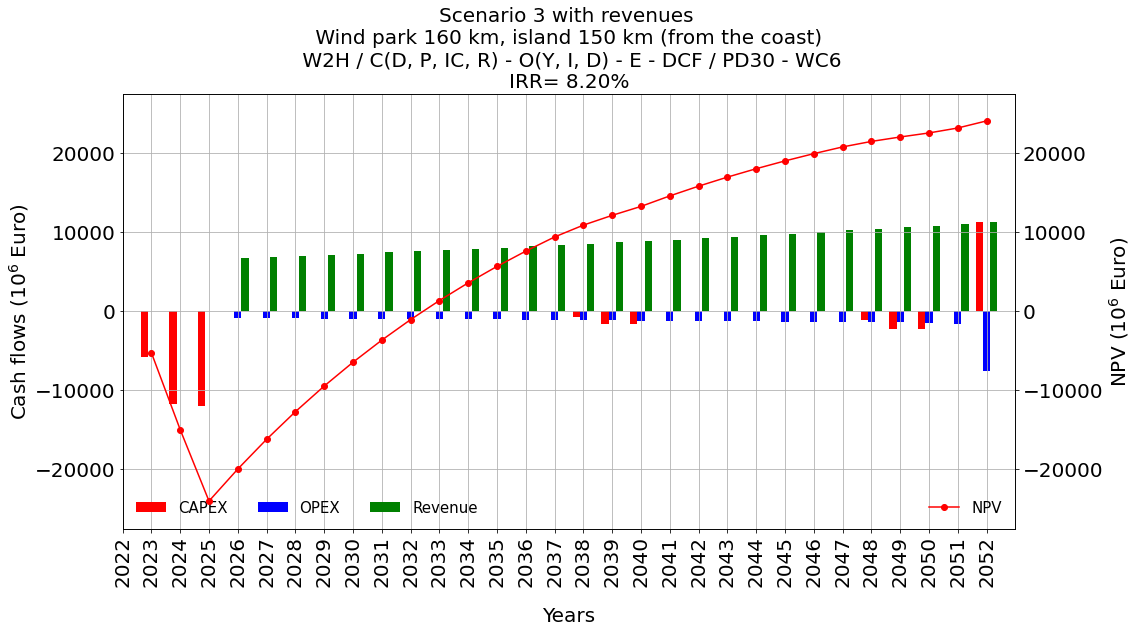

In [1232]:
# plot
create_npv_plot(df_combined_npv, title='Scenario 3 with revenues \n Wind park 160 km, island 150 km (from the coast) \n W2H / C(D, P, IC, R) - O(Y, I, D) - E - DCF / PD30 - WC6\nIRR= ' + irr_str )

In [1233]:
df_combined_npv.tail()

,years,capex,opex,revenue,cashflow,cashflow_sum,npv,npv_sum
years,,,,,,,,
2048,2048,-1.074334e+09,-1.361867e+09,1.043222e+10,7.996019e+09,1.352369e+11,6.967872e+08,2.149304e+10
2049,2049,-2.191642e+09,-1.389105e+09,1.064086e+10,7.060118e+09,1.422971e+11,5.601158e+08,2.205316e+10
2050,2050,-2.235475e+09,-1.533650e+09,1.085368e+10,7.084557e+09,1.493816e+11,5.117031e+08,2.256486e+10
2051,2051,0.000000e+00,-1.540594e+09,1.107076e+10,9.530162e+09,1.589118e+11,6.266789e+08,2.319154e+10
2052,2052,1.124181e+10,-7.553726e+09,1.129217e+10,1.498025e+10,1.738920e+11,8.968160e+08,2.408836e+10
